In [1]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
%matplotlib inline

In [2]:
DATA_IN_PATH = './preprocess/'
# 데이터 불러오기 !
KorQuAd = pd.read_csv(DATA_IN_PATH + 'KorQuAd_preprocess_Okt.csv', encoding='UTF8')
naverReview = pd.read_csv(DATA_IN_PATH + 'naverReview_preprocess_Okt.csv', encoding='UTF8')
ultraDiary = pd.read_csv(DATA_IN_PATH + 'ultraDiary_preprocess_Okt.csv', encoding='UTF8')

In [3]:
#데이터를 하나의 데이터 프레임으로 합치자!
data = KorQuAd.append(naverReview)
data = data.append(ultraDiary)
data.head()

,context
0,년 바그너 괴테 파우스트 을 처음 읽다 그 내용 에 마음 끌리다 이르다 소재 로 하...
1,한편 년 부터 바그너 와 알 고 지내다 리스트 잊혀지다 있다 악장 을 부활 시키다 ...
2,작품 라단조 아주 신중하다 박자 부드럽다 서주 로 서주 로 시작 되다 여기 에는 주...
3,커닐링구스커닐 링거 스 쿤닐링구스 영어 늘다 입술 혀 입 모든 구강 기관 으로 여성...
4,일반 적 인 통계 에 따르다 여성 가다 오르가슴 을 얻다 위해 직접 적 인 음핵 자...


In [5]:
print('전체 학습데이터의 개수: {}'.format(len(data)))

전체 학습데이터의 개수: 234941


In [8]:
lenght = data['context'].astype(str).apply(len)
lenght.head() #본문의 길이

0    647
1    496
2    425
3    384
4    418
Name: context, dtype: int64

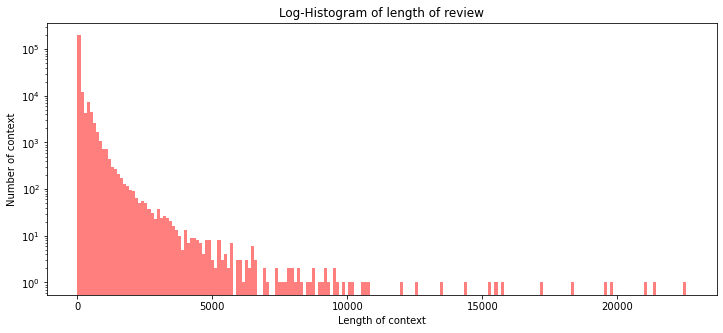

In [10]:
# 그래프에 대한 이미지 사이즈 선언
# figsize: (가로, 세로) 형태의 튜플로 입력
plt.figure(figsize=(12, 5))
# 히스토그램 선언
# bins: 히스토그램 값들에 대한 버켓 범위
# range: x축 값의 범위
# alpha: 그래프 색상 투명도
# color: 그래프 색상
# label: 그래프에 대한 라벨
plt.hist(lenght, bins=200, alpha=0.5, color= 'r', label='word')
plt.yscale('log', nonposy='clip')
# 그래프 제목
plt.title('Log-Histogram of length of review')
# 그래프 x 축 라벨
plt.xlabel('Length of context')
# 그래프 y 축 라벨
plt.ylabel('Number of context')
plt.show()

In [11]:
print('본문 길이 최대 값: {}'.format(np.max(lenght)))
print('본문 길이 최소 값: {}'.format(np.min(lenght)))
print('본문 길이 평균 값: {:.2f}'.format(np.mean(lenght)))
print('본문 길이 표준편차: {:.2f}'.format(np.std(lenght)))
print('본문 길이 중간 값: {}'.format(np.median(lenght)))
# 사분위의 대한 경우는 0~100 스케일로 되어있음
print('본문 길이 제 1 사분위: {}'.format(np.percentile(lenght, 25)))
print('본문 길이 제 3 사분위: {}'.format(np.percentile(lenght, 75)))

본문 길이 최대 값: 22550
본문 길이 최소 값: 1
본문 길이 평균 값: 104.42
본문 길이 표준편차: 310.82
본문 길이 중간 값: 30.0
본문 길이 제 1 사분위: 16.0
본문 길이 제 3 사분위: 60.0


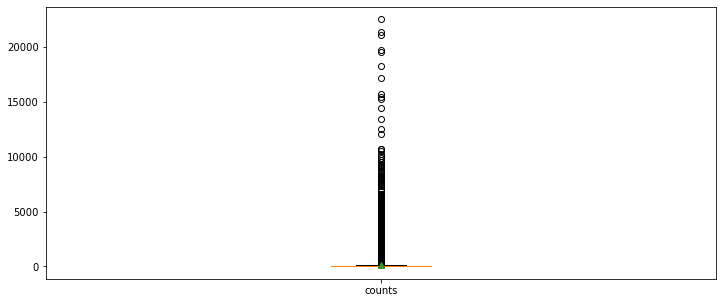

In [13]:
plt.figure(figsize=(12, 5))
# 박스플롯 생성
# 첫번째 파라메터: 여러 분포에 대한 데이터 리스트를 입력
# labels: 입력한 데이터에 대한 라벨
# showmeans: 평균값을 마크함

plt.boxplot(lenght,
             labels=['counts'],
             showmeans=True)
plt.show()

In [14]:
context = [context for context in data['context'] if type(context) is str] #wordcloud를 보기 위해

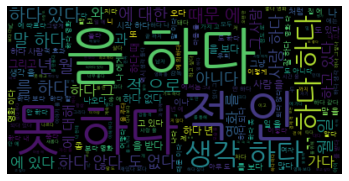

In [16]:
wordcloud = WordCloud(font_path = './NanumGothic.ttf').generate(' '.join(context))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [17]:
word_counts = data['context'].astype(str).apply(lambda x:len(x.split(' '))) # 단어를 세보자

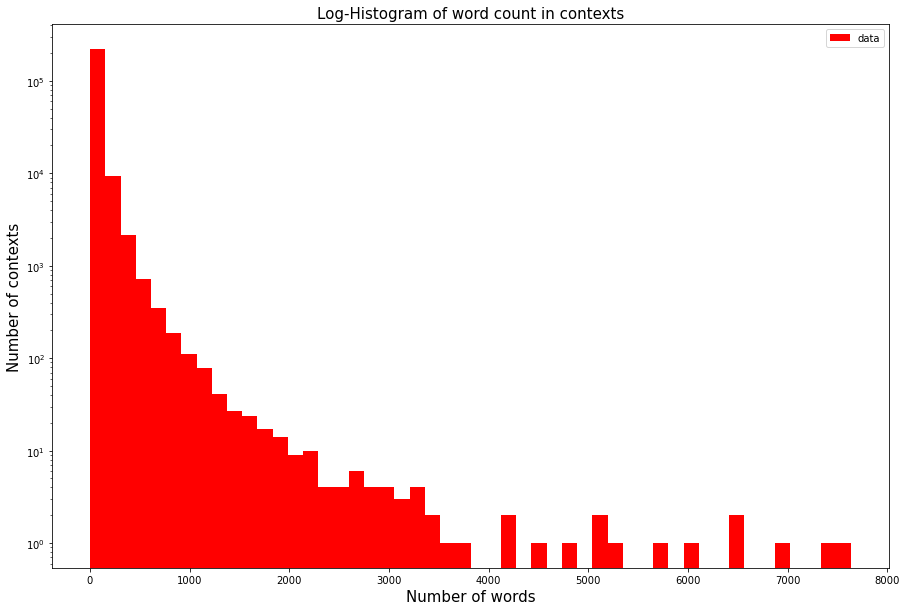

In [18]:
plt.figure(figsize=(15, 10))
plt.hist(word_counts, bins=50, facecolor='r',label='data')
plt.title('Log-Histogram of word count in contexts', fontsize=15)
plt.yscale('log', nonposy='clip')
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Number of contexts', fontsize=15)
plt.show()

In [19]:
word_counts

0         213
1         168
2         141
3         123
4         136
         ... 
24291      74
24292     132
24293      39
24294    1542
24295      70
Name: context, Length: 234941, dtype: int64

In [20]:
print('본문 단어 개수 최대 값: {}'.format(np.max(word_counts)))
print('본문 단어 개수 최소 값: {}'.format(np.min(word_counts)))
print('본문 단어 개수 평균 값: {:.2f}'.format(np.mean(word_counts)))
print('본문 단어 개수 표준편차: {:.2f}'.format(np.std(word_counts)))
print('본문 단어 개수 중간 값: {}'.format(np.median(word_counts)))
# 사분위의 대한 경우는 0~100 스케일로 되어있음
print('본문 단어 개수 제 1 사분위: {}'.format(np.percentile(word_counts, 25)))
print('본문 단어 개수 제 3 사분위: {}'.format(np.percentile(word_counts, 75)))

본문 단어 개수 최대 값: 7637
본문 단어 개수 최소 값: 1
본문 단어 개수 평균 값: 34.69
본문 단어 개수 표준편차: 103.17
본문 단어 개수 중간 값: 10.0
본문 단어 개수 제 1 사분위: 6.0
본문 단어 개수 제 3 사분위: 20.0


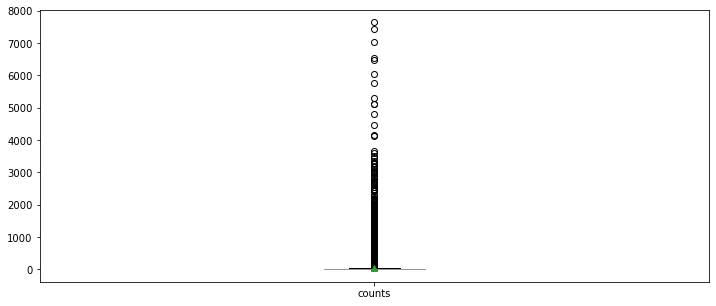

In [21]:
plt.figure(figsize=(12, 5))
# 박스플롯 생성
# 첫번째 파라메터: 여러 분포에 대한 데이터 리스트를 입력
# labels: 입력한 데이터에 대한 라벨
# showmeans: 평균값을 마크함

plt.boxplot(word_counts,
             labels=['counts'],
             showmeans=True)
plt.show()